<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/multi_dimensional/notebook/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

fatal: destination path 'complex-systems-social-graph' already exists and is not an empty directory.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
import sys
print(sys.path)

['c:\\Users\\fabio\\Desktop\\complex-systems-social-graph\\recommender_social_graph\\multi_dimensional\\notebook', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']


Importing mandatory methods

In [32]:
import copy
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%reload_ext autoreload
%autoreload 2
from multi_dimensional.graph_creation import create_graph
from multi_dimensional.test import print_graph
from multi_dimensional.abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from multi_dimensional.metrics import polarisation, sarle_bimodality, disagreement, feed_entropy
from multi_dimensional.content.content_recommender import simulate_epoch_content_recommender


Creation of a Graph with $50$ nodes, $3$ opinions

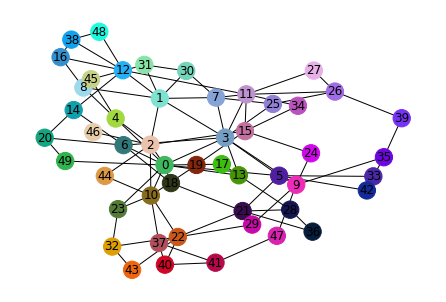

In [39]:
nodes, ops = 50, 3
G = create_graph(nodes, ops, [1], avg_friend = 2, hp_alpha=5, hp_beta=0)
print_graph(G, False)

Simulating 100 epochs with different content reccomenders (and without it)


In [88]:
random_G = copy.deepcopy(G)
random_G_base = copy.deepcopy(G)
normal_G = copy.deepcopy(G)
normal_G_base = copy.deepcopy(G)
nudge_G = copy.deepcopy(G)
nudge_G_base = copy.deepcopy(G)
nudge_opt_G = copy.deepcopy(G)
nudge_opt_G_base = copy.deepcopy(G)
similar_G = copy.deepcopy(G)
similar_G_base = copy.deepcopy(G)
unsimilar_G = copy.deepcopy(G)
unsimilar_G_base = copy.deepcopy(G)
random_param = {'n_post': 2}
normal_param = {'normal_mean': 0.5, 'normal_std': 0.1, 'n_post': 2}
nudge_param = {'nudge_goal': 0.5, 'n_post': 2}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}

for i in range(75):
  G = simulate_epoch_updated(G, ops, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, ops, 50, 50, strat_param=random_param, estim_strategy='kalman')
  random_G_base = simulate_epoch_content_recommender(random_G, ops, 50, 50, strat_param=random_param, estim_strategy='base')
  normal_G = simulate_epoch_content_recommender(normal_G, ops, 50, 50, strategy="normal", strat_param=normal_param, estim_strategy='kalman')
  normal_G_base = simulate_epoch_content_recommender(normal_G, ops, 50, 50, strategy="normal", strat_param=normal_param, estim_strategy='base')
  nudge_G = simulate_epoch_content_recommender(nudge_G, ops, 50, 50, strategy="nudge", strat_param=nudge_param, estim_strategy='kalman')
  nudge_G_base = simulate_epoch_content_recommender(nudge_G, ops, 50, 50, strategy="nudge", strat_param=nudge_param, estim_strategy='base')
  nudge_opt_G = simulate_epoch_content_recommender(nudge_var_G, ops, 50, 50, strategy="nudge_opt", strat_param=nudge_param, estim_strategy='kalman')
  nudge_opt_G_base = simulate_epoch_content_recommender(nudge_var_G, ops, 50, 50, strategy="nudge_opt", strat_param=nudge_param, estim_strategy='base')
  similar_G = simulate_epoch_content_recommender(similar_G, ops, 50, 50,  strategy="similar", strat_param=similar_param, estim_strategy='kalman')
  similar_G_base = simulate_epoch_content_recommender(similar_G, ops, 50, 50,  strategy="similar", strat_param=similar_param, estim_strategy='base')
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, ops, 50, 50, strategy="unsimilar", strat_param=unsimilar_param, estim_strategy='kalman')
  unsimilar_G_base = simulate_epoch_content_recommender(unsimilar_G, ops, 50, 50, strategy="unsimilar", strat_param=unsimilar_param, estim_strategy='base')

Printing graphs

No recommender


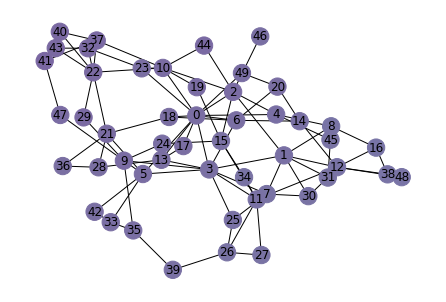

Random
Kalman


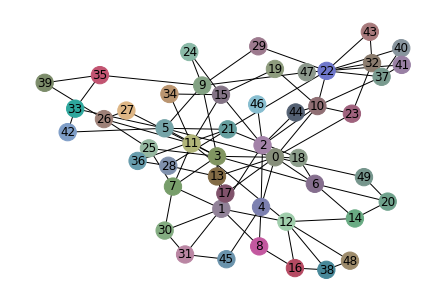

Base


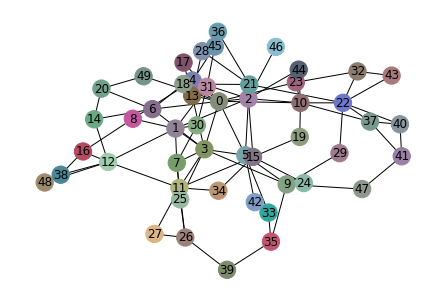

Normal
Kalman


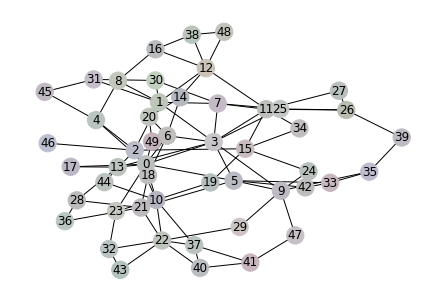

Base


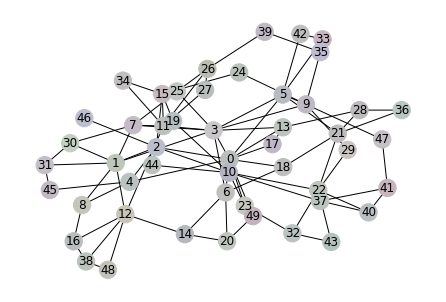

Nudge
Kalman


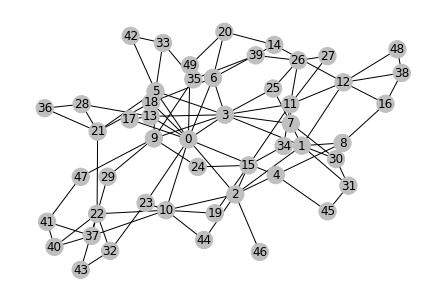

Base


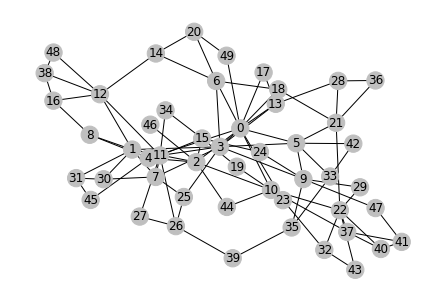

Nudge Opt
Kalman


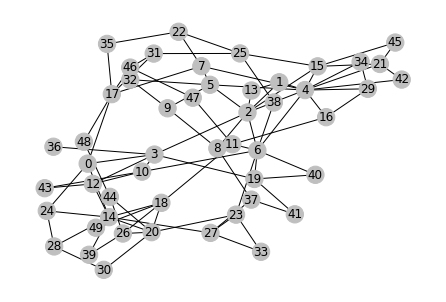

Base


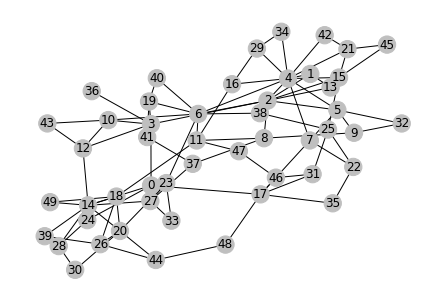

Similar
Kalman


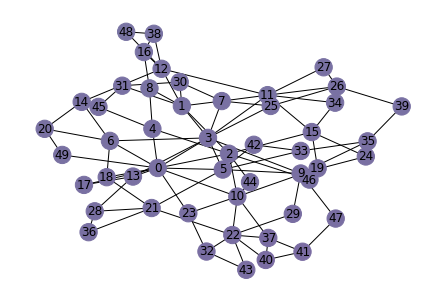

Base


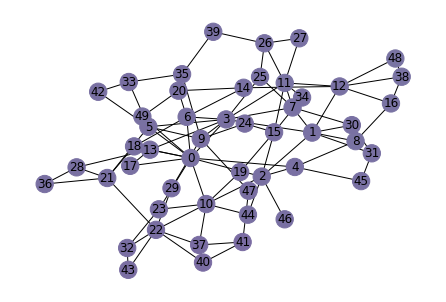

Unsimilar
Kalman


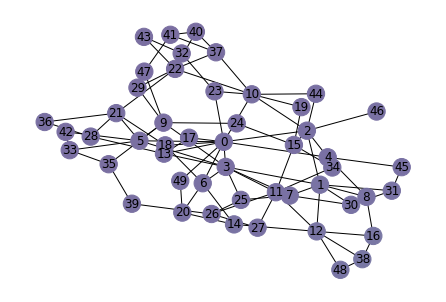

Base


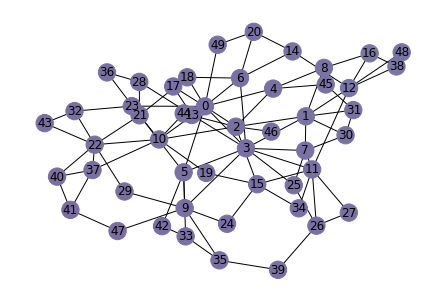

In [84]:
print('No recommender')
print_graph(G, False)
print('Random')
print('Kalman')
print_graph(random_G, False)
print('Base')
print_graph(random_G_base, False)
print('Normal')
print('Kalman')
print_graph(normal_G, False)
print('Base')
print_graph(normal_G_base, False)
print('Nudge')
print('Kalman')
print_graph(nudge_G, False)
print('Base')
print_graph(nudge_G_base, False)
print('Nudge Opt')
print('Kalman')
print_graph(nudge_opt_G, False)
print('Base')
print_graph(nudge_opt_G_base, False)
print('Similar')
print('Kalman')
print_graph(similar_G, False)
print('Base')
print_graph(similar_G_base, False)
print("Unsimilar")
print('Kalman')
print_graph(unsimilar_G, False)
print('Base')
print_graph(unsimilar_G_base, False)

Polarisation


In [89]:
print('No recommender:\t\t' + str(polarisation(G)))
print('Random Kalman:\t\t' + str(polarisation(random_G)) + '\t\tRandom Base:\t' + str(polarisation(random_G_base)))
print('Normal Kalman:\t\t' + str(polarisation(normal_G)) + '\t\tNormal Base:\t' + str(polarisation(normal_G_base)))
print('Nudge Kalman:\t\t' + str(polarisation(nudge_G)) + '\t\tNudge Base:\t' + str(polarisation(nudge_G_base)))
print('Nudge Opt Kalman:\t' + str(polarisation(nudge_opt_G)) + '\t\tNudge Opt Base:\t' + str(polarisation(nudge_opt_G_base)))
print('Similar Kalman:\t\t' + str(polarisation(similar_G)) + '\t\tSimilar Base:\t' + str(polarisation(similar_G_base)))
print('Unsimilar Kalman:\t' + str(polarisation(unsimilar_G)) + '\t\tUnsimilar Base:\t' + str(polarisation(unsimilar_G_base)))

No recommender:		0.004536073842562716
Random Kalman:		34.71242267172404		Random Base:	34.71242267172404
Normal Kalman:		0.12623044152441343		Normal Base:	0.12623044152441343
Nudge Kalman:		2.1019454147008787e-05		Nudge Base:	2.1019454147008787e-05
Nudge Opt Kalman:	0		Nudge Opt Base:	0
Similar Kalman:		0.0006110775041376915		Similar Base:	0.0006110775041376915
Unsimilar Kalman:	0.003850035722951284		Unsimilar Base:	0.003850035722951284


Disagreement


In [82]:
print(sum(disagreement(G).values()))
print(sum(disagreement(random_G).values()))
print(sum(disagreement(random_G_base).values()))
print(sum(disagreement(normal_G).values()))
print(sum(disagreement(normal_G_base).values()))
print(sum(disagreement(nudge_G).values()))
print(sum(disagreement(nudge_G_base).values()))
print(sum(disagreement(nudge_opt_G).values()))
print(sum(disagreement(nudge_opt_G_base).values()))
print(sum(disagreement(similar_G).values()))
print(sum(disagreement(similar_G_base).values()))
print(sum(disagreement(unsimilar_G).values()))
print(sum(disagreement(unsimilar_G_base).values()))

1.6316450379191147
26.849314097994
26.849314097994
5.837547633011643
5.837547633011643
0.01608058399448462
0.01608058399448462
1.9661120419219734e-06
1.9661120419219734e-06
0.46699056111582976
0.46699056111582976
1.4460270331780094
1.4460270331780094


Sarle bimodality

In [85]:
print(sarle_bimodality(G, ops))
print(sarle_bimodality(random_G, ops))
print(sarle_bimodality(random_G_base, ops))
print(sarle_bimodality(normal_G, ops))
print(sarle_bimodality(normal_G_base, ops))
print(sarle_bimodality(nudge_G, ops))
print(sarle_bimodality(nudge_G_base, ops))
print(sarle_bimodality(nudge_opt_G, ops))
print(sarle_bimodality(nudge_opt_G_base, ops))
print(sarle_bimodality(similar_G, ops))
print(sarle_bimodality(similar_G_base, ops))
print(sarle_bimodality(unsimilar_G, ops))
print(sarle_bimodality(unsimilar_G_base, ops))

[-3.756945200742835, -1.5646946813958396, -1.2683744383900433]
[1.1218711649190758, -3.1704064589464207, -4.269253617408636]
[1.1218711649190758, -3.1704064589464207, -4.269253617408636]
[-1.7175379647753177, 2.657929631768736, 0.9736657288335706]
[-1.7175379647753177, 2.657929631768736, 0.9736657288335706]
[0.9904909290449386, 1.2258133124588657, 0.6703621783519291]
[0.9904909290449386, 1.2258133124588657, 0.6703621783519291]
[0.5848150060141499, 1.5212477612473343, 1.0081894591441036]
[0.5848150060141499, 1.5212477612473343, 1.0081894591441036]
[0.6906523812944381, -1.3841309879473496, -1.2613145158660697]
[0.6906523812944381, -1.3841309879473496, -1.2613145158660697]
[-3.8803335713147886, 2.1323836037739397, -1.0908774258992793]
[-3.8803335713147886, 2.1323836037739397, -1.0908774258992793]


Feed Entropy

In [86]:
print(sum(feed_entropy(G, ops).values()) / nodes)
print(sum(feed_entropy(random_G, ops).values()) / nodes)
print(sum(feed_entropy(random_G_base, ops).values()) / nodes)
print(sum(feed_entropy(normal_G, ops).values()) / nodes)
print(sum(feed_entropy(normal_G_base, ops).values()) / nodes)
print(sum(feed_entropy(nudge_G, ops).values()) / nodes)
print(sum(feed_entropy(nudge_G_base, ops).values()) / nodes)
print(sum(feed_entropy(nudge_opt_G, ops).values()) / nodes)
print(sum(feed_entropy(nudge_opt_G_base, ops).values()) / nodes)
print(sum(feed_entropy(similar_G, ops).values()) / nodes)
print(sum(feed_entropy(similar_G_base, ops).values()) / nodes)
print(sum(feed_entropy(unsimilar_G, ops).values()) / nodes)
print(sum(feed_entropy(unsimilar_G_base, ops).values()) / nodes)

nan
nan
0.891055159116539
0.891055159116539
0.48364658866421434
0.48364658866421434
0.47633338355740207
0.47633338355740207
0.47271697420312264
0.47271697420312264
0.0016374578060811104
0.0016374578060811104
0.005059635426262069
0.005059635426262069
